In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [269]:
data = pd.read_csv("anime.csv")

In [270]:
data

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.13,1871705,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1509622,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.07,1329500,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.08,1252286,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Movic', '...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' re...,https://cdn.myanimelist.net/images/anime/5/731...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.95,1398608,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Winner of the Excellence Award on the 20th Jap...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24160,52470,STARTLINER,music,NaN,0,finished_airing,1.0,2018-07-25,2018-07-25,game,...,[],[],"Music video for the main theme of ONGEKI, ""STA...",NaN,https://cdn.myanimelist.net/images/anime/1911/...,https://myanimelist.net/anime/52470/STARTLINER,NaN,NaN,STARTLINER,[]
24161,52474,Blue Archive: 1.5 Shuunenkinen Short Animation,ona,NaN,0,finished_airing,1.0,2022-07-16,NaN,NaN,...,[],[],NaN,NaN,NaN,https://myanimelist.net/anime/52474/Blue_Archi...,NaN,"Blue Archive ""New Summer Animation PV""",ブルーアーカイブ-Blue Archive-「1.5周年記念ショートアニメーション」,[]
24162,52475,Ryuujin Kappei,ova,NaN,0,finished_airing,1.0,1991-04-21,1991-04-21,original,...,[],[],Kappei got drown into a strange picture book. ...,NaN,https://cdn.myanimelist.net/images/anime/1301/...,https://myanimelist.net/anime/52475/Ryuujin_Ka...,NaN,NaN,龍神カッペイ,[]
24163,52476,Yeongnihan neoguri,NaN,NaN,0,finished_airing,57.0,1988-01-01,2007-01-01,original,...,[],[],Clever Raccoon Dog is a North Korean animated ...,NaN,NaN,https://myanimelist.net/anime/52476/Yeongnihan...,NaN,The Little Bear,령리한 너구리,[]


In [271]:
data.columns

Index(['anime_id', 'title', 'type', 'score', 'scored_by', 'status', 'episodes',
       'start_date', 'end_date', 'source', 'members', 'favorites',
       'episode_duration', 'total_duration', 'rating', 'sfw', 'approved',
       'created_at', 'updated_at', 'start_year', 'start_season',
       'real_start_date', 'real_end_date', 'broadcast_day', 'broadcast_time',
       'genres', 'themes', 'demographics', 'studios', 'producers', 'licensors',
       'synopsis', 'background', 'main_picture', 'url', 'trailer_url',
       'title_english', 'title_japanese', 'title_synonyms'],
      dtype='object')

In [272]:
data = data.dropna()

In [273]:
data

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.07,1329500,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.08,1252286,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Movic', '...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' re...,https://cdn.myanimelist.net/images/anime/5/731...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
10,1535,Death Note,tv,8.62,2451294,finished_airing,37.0,2006-10-04,2007-06-27,manga,...,"['VAP', 'Konami', 'Ashi Production', 'Nippon T...",['VIZ Media'],"Brutal murders, petty thefts, and senseless vi...",Death Note has been adapted into live action f...,https://cdn.myanimelist.net/images/anime/9/945...,https://myanimelist.net/anime/1535/Death_Note,https://www.youtube.com/watch?v=Vt_3c8BgxV4,Death Note,デスノート,['DN']
11,40748,Jujutsu Kaisen (TV),tv,8.68,1249570,finished_airing,24.0,2020-10-03,2021-03-27,manga,...,"['Mainichi Broadcasting System', 'TOHO animati...",[],Idly indulging in baseless paranormal activiti...,Winner of the Anime of the Year (TV Series) at...,https://cdn.myanimelist.net/images/anime/1171/...,https://myanimelist.net/anime/40748/Jujutsu_Ka...,https://www.youtube.com/watch?v=4A_X-Dvl0ws,Jujutsu Kaisen,呪術廻戦,"['Sorcery Fight', 'JJK']"
12,23273,Shigatsu wa Kimi no Uso,tv,8.66,1207643,finished_airing,22.0,2014-10-10,2015-03-20,manga,...,"['Aniplex', 'Dentsu', 'Kodansha', 'Fuji TV', '...",['Aniplex of America'],"Kousei Arima is a child prodigy known as the ""...",Winner in the anime division of the 2016 Sugoi...,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,https://www.youtube.com/watch?v=aMJpI_fEsA4,Your Lie in April,四月は君の嘘,['Kimiuso']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8352,32606,Onigiri,tv,5.33,9643,finished_airing,13.0,2016-04-07,2016-06-30,game,...,"['Pierrot', 'Being', 'Zack Promotion', 'Bushir...",['Sentai Filmworks'],Ancient Japan is under attack by powerful bein...,Based on the MMORPG of the same title released...,https://cdn.myanimelist.net/images/anime/13/79...,https://myanimelist.net/anime/32606/Onigiri,https://www.youtube.com/watch?v=9UUyUR1SvZM,Onigiri,鬼斬,"['Demon Cutter', 'Demon Slayer']"
8377,36458,Soukou Musume Senki,tv,5.76,3692,finished_airing,12.0,2021-01-07,2021-03-25,game,...,['DMM Music'],['Funimation'],"Riko Morisawa, a young girl from Tokorozawa, g...",Soukou Musume Senki is an anime adaptation bas...,https://cdn.myanimelist.net/images/anime/1532/...,https://myanimelist.net/anime/36458/Soukou_Mus...,https://www.youtube.com/watch?v=IutbV9SITpA,LBX Girls,装甲娘戦機,[]
8700,32455,Gekidol: Actidol Project,tv,5.52,4400,finished_airing,12.0,2021-01-05,2021-03-03,original,...,[],['Funimation'],"Five years ago, a mysterious phenomenon known ...",Gekidol's first episode was aired along with A...,https://cdn.myanimelist.net/images/anime/1195/...,https://myanimelist.net/anime/32455/Gekidol__A...,https://www.youtube.com/watch?v=U7RRsZfilkE,Gekidol,ゲキドル,[]
8926,38162,Rinshi!! Ekoda-chan,tv,5.55,3464,finished_airing,11.0,2019-01-09,2019-03-27,4_koma_manga,...,"['Sotsu', 'AT-X', 'Tokyo MX', 'Exit Tunes', 'R...",['Funimation'],Ekoda-chan lives much like any other 24-year-o...,Every episode of Rinshi!! Ekoda-chan is dire

In [274]:
dataClean =  ["members",
              "favorites",
              "sfw",
              "approved","created_at",
              "updated_at",
              "start_year",
              "broadcast_time",
              "broadcast_day",
              "real_end_date",
            "start_season",
              "demographics",
              "synopsis",
              "background",
              "main_picture",
             "title_synonyms",
             "title_japanese",
             "title_english",
             "trailer_url",
             "url",
             "rating",
             "genres",
             "themes",
             "studios",
             "licensors",
             "producers"]
data = data.drop(dataClean, axis = 1)

In [275]:
data.to_csv("animeclean", index= False)

In [276]:
dataClean=pd.read_csv("animeclean")

In [277]:
dataClean

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,episode_duration,total_duration,real_start_date
0,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.07,1329500,finished_airing,10.0,2019-04-29,2019-07-01,manga,0 days 00:23:55,0 days 03:59:10,2019-04-29
1,9253,Steins;Gate,tv,9.08,1252286,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,0 days 00:24:20,0 days 09:44:00,2011-04-06
2,1535,Death Note,tv,8.62,2451294,finished_airing,37.0,2006-10-04,2007-06-27,manga,0 days 00:23:00,0 days 14:11:00,2006-10-04
3,40748,Jujutsu Kaisen (TV),tv,8.68,1249570,finished_airing,24.0,2020-10-03,2021-03-27,manga,0 days 00:23:55,0 days 09:34:00,2020-10-03
4,23273,Shigatsu wa Kimi no Uso,tv,8.66,1207643,finished_airing,22.0,2014-10-10,2015-03-20,manga,0 days 00:22:55,0 days 08:24:10,2014-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,32606,Onigiri,tv,5.33,9643,finished_airing,13.0,2016-04-07,2016-06-30,game,0 days 00:04:00,0 days 00:52:00,2016-04-07
418,36458,Soukou Musume Senki,tv,5.76,3692,finished_airing,12.0,2021-01-07,2021-03-25,game,0 days 00:23:47,0 days 04:45:24,2021-01-07
419,32455,Gekidol: Actidol Project,tv,5.52,4400,finished_airing,12.0,2021-01-05,2021-03-03,original,0 days 00:23:49,0 days 04:45:48,2021-01-05
420,38162,Rinshi!! Ekoda-chan,tv,5.55,3464,finished_airing,11.0,2019-01-09,2019-03-27,4_koma_manga,0 days 00:05:00,0 days 00:55:00,2019-01-09


In [307]:
atribut = ["score","scored_by"]

In [308]:
dataterpilih = dataClean[atribut]

In [309]:
dataterpilih

,score,scored_by
0,9.07,1329500
1,9.08,1252286
2,8.62,2451294
3,8.68,1249570
4,8.66,1207643
...,...,...
417,5.33,9643
418,5.76,3692
419,5.52,4400
420,5.55,3464


In [310]:
X = np.asarray(dataterpilih) 

In [311]:
X

array([[9.070000e+00, 1.329500e+06],
       [9.080000e+00, 1.252286e+06],
       [8.620000e+00, 2.451294e+06],
       [8.680000e+00, 1.249570e+06],
       [8.660000e+00, 1.207643e+06],
       [8.620000e+00, 1.366582e+06],
       [8.760000e+00, 8.448300e+05],
       [8.530000e+00, 2.484450e+06],
       [8.540000e+00, 1.732637e+06],
       [8.510000e+00, 1.989312e+06],
       [8.640000e+00, 8.373040e+05],
       [8.630000e+00, 8.262450e+05],
       [8.450000e+00, 1.080271e+06],
       [8.580000e+00, 5.696950e+05],
       [8.500000e+00, 6.562850e+05],
       [8.350000e+00, 1.031280e+06],
       [8.440000e+00, 6.768720e+05],
       [8.340000e+00, 9.414870e+05],
       [8.310000e+00, 1.214990e+06],
       [8.330000e+00, 9.095070e+05],
       [8.350000e+00, 7.202540e+05],
       [8.360000e+00, 6.864060e+05],
       [8.430000e+00, 5.248230e+05],
       [8.250000e+00, 1.264633e+06],
       [8.370000e+00, 5.936810e+05],
       [8.280000e+00, 8.929300e+05],
       [8.770000e+00, 3.307780e+05],
 

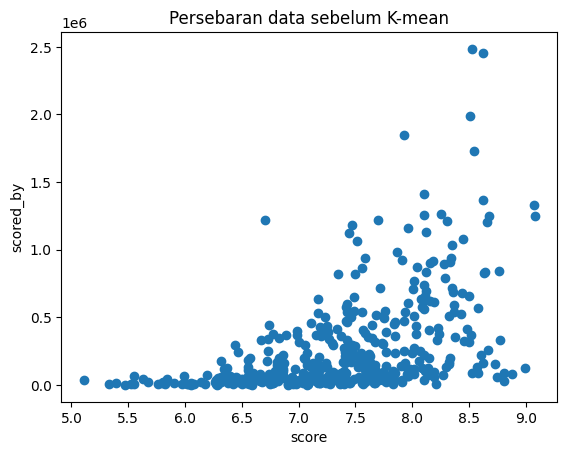

In [321]:
plt.scatter(X[:,0], X[:,1], label = "true position")
plt.xlabel('score')
plt.ylabel('scored_by')
plt.title('Persebaran data sebelum K-mean')
plt.show()

In [313]:
k = 5
kmeans = KMeans(n_clusters=k)

#kmeans = KMeans(n_clusters=5)

In [328]:
kmeans.fit(X)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [329]:
pusat = kmeans.cluster_centers_
pusat

array([[8.12384615e+00, 1.12291500e+06],
       [7.53359551e+00, 3.18654124e+05],
       [7.11776471e+00, 6.39398471e+04],
       [7.96021277e+00, 6.43736255e+05],
       [8.42600000e+00, 2.10042100e+06]])

In [330]:
labels = kmeans.labels_

In [331]:
labels

array([0, 0, 4, 0, 0, 0, 3, 4, 4, 4, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3,
       3, 0, 3, 0, 1, 3, 3, 1, 1, 3, 0, 1, 1, 0, 1, 1, 0, 3, 0, 0, 3, 3,
       1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 0, 2, 2, 4, 1, 3, 1,
       3, 0, 1, 2, 2, 3, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       3, 2, 0, 2, 2, 3, 3, 3, 1, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 0, 1, 2, 1, 2, 3, 1, 3, 2, 2, 1, 1, 2, 0, 1, 1, 2, 3, 2,
       0, 3, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 3, 2, 2, 2, 1, 2, 2, 3, 3, 3,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 3, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 1, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,

In [332]:
score = 0
scored_by = 1

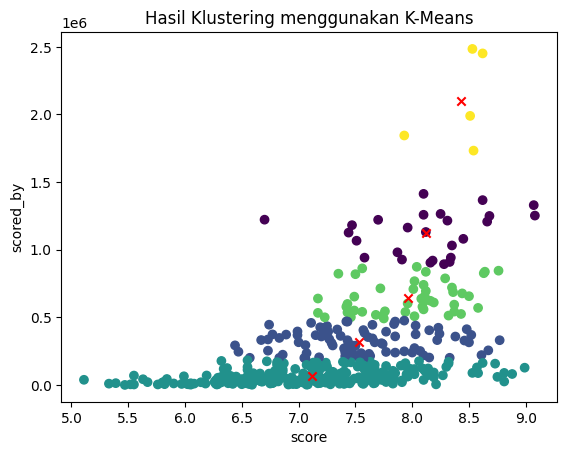

In [335]:
plt.scatter(dataterpilih['score'].values, dataterpilih['scored_by'].values, c=labels)
plt.scatter(pusat[:, score], pusat[:, scored_by], marker='x', color='red')
plt.xlabel('score')
plt.ylabel('scored_by')
plt.title('Hasil Klustering menggunakan K-Means')
plt.show()

#plt.scatter(X[:,0], X[:,1], cmap=labels)
#plt.scatter(pusat[:, 0], pusat[:, 1], marker='x', color='red')
#plt.xlabel('score')
#plt.ylabel('scored_by')
#plt.title('Hasil Klustering menggunakan K-Means')
#plt.show()